In [307]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

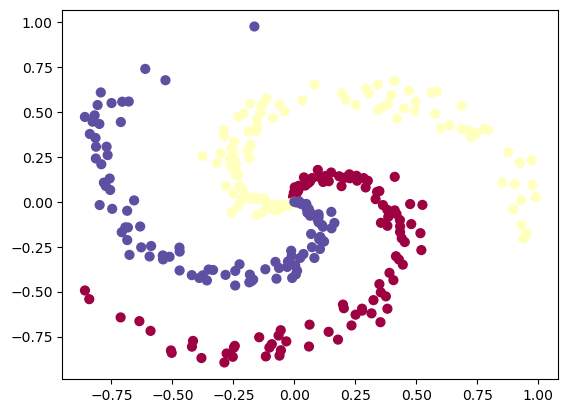

In [308]:
N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row = single example)
y = np.zeros(N * K, dtype="uint8")  # class labels
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [309]:
X = torch.zeros((N * K, D)).float()  # data matrix (each row = single example)
y = torch.zeros(
    N * K,
).long()

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = torch.linspace(0.0, 1, N)  # radius
    t = torch.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = torch.tensor(np.c_[r * np.sin(t), r * np.cos(t)]).float()
    y[ix] = j

model = nn.Sequential(
    nn.Linear(D, K),
    nn.Linear(K, 100),
    nn.ReLU(),
    nn.Linear(100, K),
)

In [310]:
print(f'Total number of parameters: {sum(p.nelement() for p in model.parameters())}')

Total number of parameters: 712


In [311]:
import torch.nn.functional as F

loss_fn = nn.CrossEntropyLoss()
learning_rate =  1e-0 #+ 2e-1
reg_strength = 1e-3
epochs = 10000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

lossi = []

for i in range(epochs):
    scores = model(X)
    pred = F.softmax(scores, dim=1)
    loss = loss_fn(pred, y)
    reg_loss = 0.5 * reg_strength * sum(torch.sum(p * p) for p in model.parameters())
    loss += reg_loss
    acc = (pred.argmax(1) == y).float().mean().item()

    if i % 1000 == 0:
        print(f"iteration: {i} loss: {loss.item()} accuracy: {round(acc*100, 2)}")
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    lossi.append(loss.item())

print("-"*100)
print(f"Average Loss: {np.mean(lossi)}")

iteration: 0 loss: 1.1256221532821655 accuracy: 30.33
iteration: 1000 loss: 0.6643733382225037 accuracy: 98.67
iteration: 2000 loss: 0.6601455807685852 accuracy: 99.0
iteration: 3000 loss: 0.6595626473426819 accuracy: 99.0
iteration: 4000 loss: 0.6594371199607849 accuracy: 99.0
iteration: 5000 loss: 0.6593793630599976 accuracy: 99.0
iteration: 6000 loss: 0.6593349575996399 accuracy: 99.0
iteration: 7000 loss: 0.6593215465545654 accuracy: 99.0
iteration: 8000 loss: 0.6592963337898254 accuracy: 99.0
iteration: 9000 loss: 0.6592775583267212 accuracy: 99.0
----------------------------------------------------------------------------------------------------
Average Loss: 0.6651365394234657


# Loss Log
numpy: 0.27
pytorch: 0.66

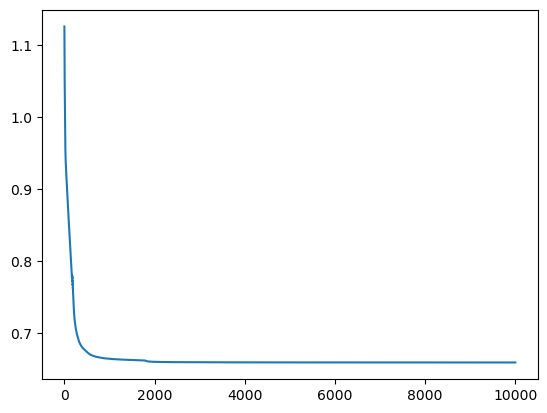

In [312]:
plt.plot(lossi)

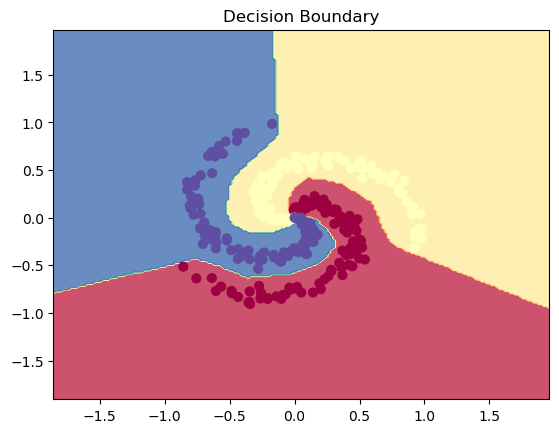

In [313]:
def plot_decision_boundary(X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    input = torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float()
    scores = model(input)
    pred = F.softmax(scores, dim=1)
    Z = pred.argmax(1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")


plot_decision_boundary(X, y)